In [3]:
import math
import numpy as np 
import matplotlib.pyplot as plt 

In [4]:
def f(x):
    return 3*x**2 - 4*x +5

In [5]:
class Value:
    def __init__(self,data, _children=(),_op='', label=''):
        self.data =data
        self._prev = set(_children)
        self._op=_op
        self.grad=0.0
        self.label = label
    def __repr__(self):
        return f"Value(data={self.data})"
    def __add__(self,data2):
        out = Value(self.data+ data2.data, (self,data2),'+')
        return out
    def __mul__(self,data2):
        out = Value(self.data*data2.data, (self, data2),'*')
        return out

a= Value(2.0, label='a')
b= Value(-3.0, label='b')
c= Value(10.0, label='c')

e=a*b; e.label='e'
d=e+c; d.label='d'
f= Value(-2.0, label='f')
L= d*f;L.label='L'
L

Value(data=-8.0)

     # grad->zero means no affect, so at initialzation we're assuming that every value does not impact/afffect the output 
    so if gradient=0 means changing in this variable is not 
    changing the loss function

In [6]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [7]:
d._op

'+'

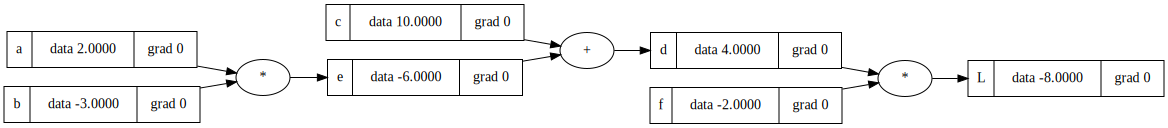

In [8]:
#for visulaization:
from graphviz import Digraph

def trace(root):
# builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s|data %.4f |grad %4.f }" % (n.label,n.data, n.grad), shape='record' )
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect nl to the op node of n2
        dot.edge(str(id(n1)),str(id(n2))+n2._op)
    return dot

draw_dot(L)

Grad representing the derivative of the output in thiss case L with respect to this value.

e.g:

->derivative of L w.r.t f

->derivative of L w.r.t d ..and so on.


In [ ]:
L=d*f
# derivative of L w.r.t d
dL/dd =? f

(f(x+h)-f(x)/h)

((d+h)*f-d*f)h

(d*f +h*f -d*f)/hasattr

(h*f)/h
f

In [ ]:
L.grad=1.0

In [24]:
def lol():
    h = 0.001
    # First forward pass
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data

    # Second forward pass (bump L2)
    a = Value(2.0, label='a') 
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L2 = L.data+h  # bumped L2 by h

    print((L2 - L1) / h)

lol()


1.000000000000334
